# The logistic map

###### A simple function with astonishing properties.

Table of contents
* [Function definitions](#Functions)
* [Time series plots](#Time-series-plots)
* [Bifurcation diagram](#Bifurcation-diagram)
* [Bonus section: negative _r_](#Bonus-section:-negative-r)

## Imports

In [1]:
import matplotlib.pyplot as plt
%pylab inline
matplotlib.style.use('ggplot')
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## Functions

The logistic map -- it's as easy as that!

In [2]:
def f(x, r):
    return r * x * (1 - x)

Make a sequence by applying the logistic map.

In [3]:
def make_sequence(n_steps, start=0.2, r=3.8):
    y = start
    sequence = [start]
    for __ in range(n_steps - 1):
        y = f(y, r)
        sequence.append(y)
    return sequence

Plot that cobweb diagram and sequence of the logistic map.

In [4]:
def plot_logistic_map(
    r,
    n_steps=15,
    x_start=0.1,
    pad=0.05,
    figsize=(10, 5),
    cob_start=0,
    cob_end=1,
    xmin=0,
    ymin=0,
    ymax=1,
):
    fig, ax = plt.subplots(1, figsize=figsize)

    # cobweb diagram
    x = np.linspace(cob_start, cob_end, 100000)
    y = f(x, r)

    ax.plot(x, y, 'k', lw=2)
    ax.plot(x, x, 'k--')

    # time series
    y = make_sequence(n_steps, x_start, r)
    x = np.linspace(cob_end + pad, cob_end + 1, len(y))

    for i, (yi, yj) in enumerate(zip(y, y[1:] + y[-1:])):
        ax.plot([yi, yi], [yi, yj], 'r')
        ax.plot([yi, yj], [yj, yj], 'r')
        ax.plot([yi, x[i]], [yi, yi], 'k', alpha=0.5)

    ax.plot(x, y, 'ro-')

    # layout
    ax.set_ylim([ymin - pad, ymax + pad])
    ax.set_xlim([xmin - pad, x[-1] + pad])
    ax.set_xticklabels([])
    ax.set_yticklabels([]);

Plot the bifurcation diagram.

In [5]:
def plot_bifurcation(
    time_steps=1000,
    r_steps=2500,
    r_start=2.7,
    r_end=4,
    x_start=0.1,
    pad=0.05,
    figsize=(6, 6),
    alpha=0.1,
    ymin=0,
    ymax=1,
):
    fig, ax = plt.subplots(1, figsize=figsize)
    y_min = np.inf
    y_max = -np.inf

    for ri in np.linspace(r_start, r_end, r_steps):
        y = make_sequence(time_steps, x_start, ri)
        ax.plot(ri * np.ones(time_steps - 100), y[100:], 'k.', 
                alpha=alpha, markersize=0.5)

    ax.set_xlim([r_start - pad, r_end + pad])
    ax.set_ylim([ymin - pad, ymax + pad])

## Time series plots

With increasing _r_, the number of attractors rises.

### r = 2

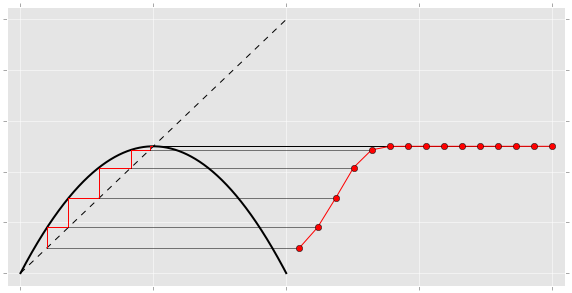

In [6]:
plot_logistic_map(2)

### r = 3.2

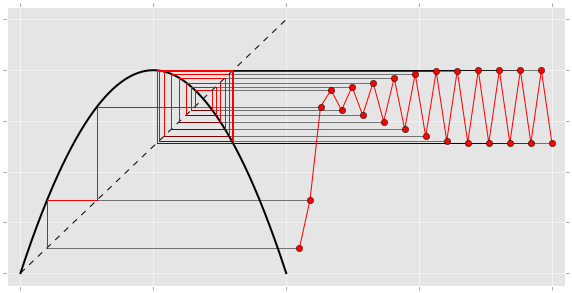

In [7]:
plot_logistic_map(3.2, 25)

### r = 3.5

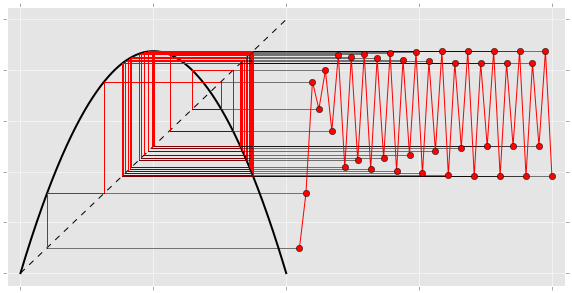

In [8]:
plot_logistic_map(3.5, 40)

### r = 3.55

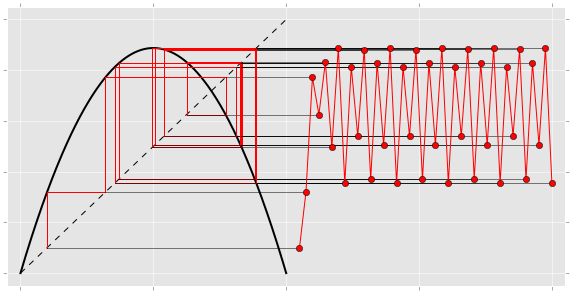

In [9]:
plot_logistic_map(3.55, 40)

### r = 3.8, chaos

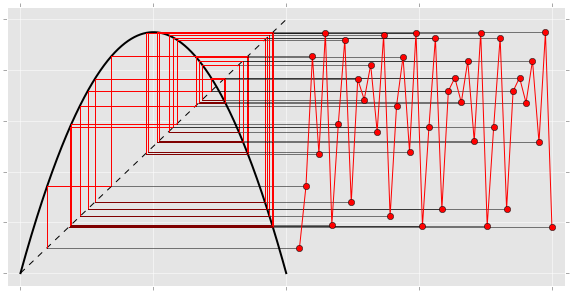

In [10]:
plot_logistic_map(3.8, 40)

### r = 3.85, suddendly order

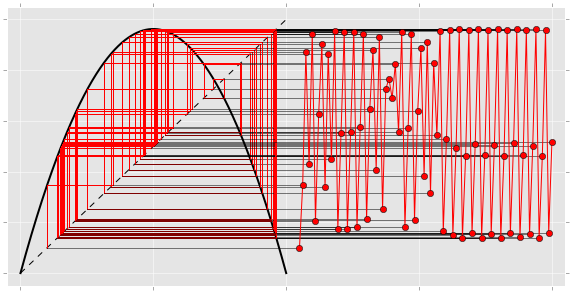

In [11]:
plot_logistic_map(3.85, 80)

### r = 4, chaos again

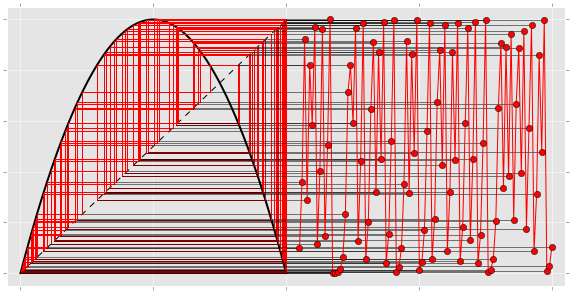

In [12]:
plot_logistic_map(4, 100)

## Bifurcation diagram

Show the attractors as a function of _r_.

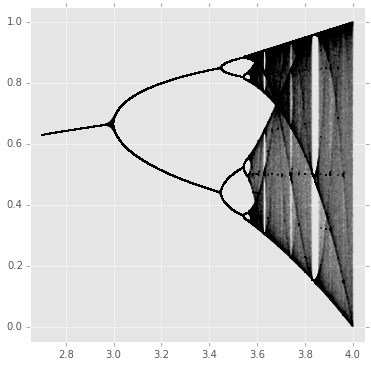

In [13]:
plot_bifurcation()

## Bonus section: negative _r_

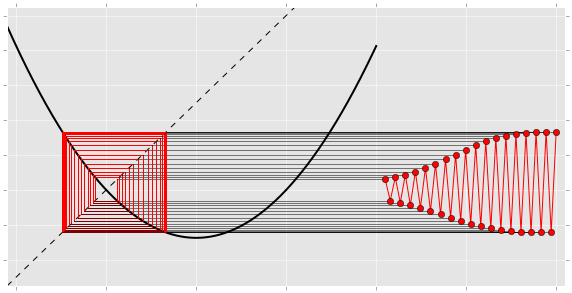

In [14]:
plot_logistic_map(-1.1, 35, cob_start=-1, cob_end=1.5, x_start=0.06, xmin=-0.5, ymin=-0.5)

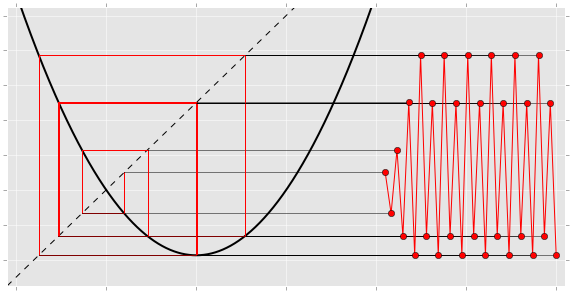

In [15]:
plot_logistic_map(-1.5, 30, cob_start=-1, cob_end=1.5, xmin=-0.5, ymin=-0.5)

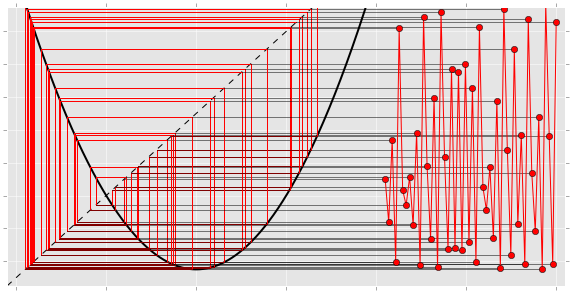

In [16]:
plot_logistic_map(-1.8, 50, cob_start=-1, cob_end=1.5, xmin=-0.5, ymin=-0.5, ymax=1.1)

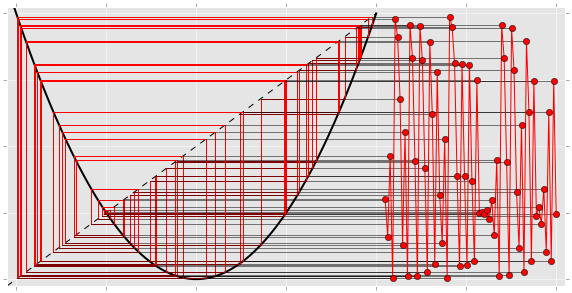

In [17]:
plot_logistic_map(-2, 70, cob_start=-1, cob_end=1.5, xmin=-0.5, ymin=-0.5, ymax=1.5)

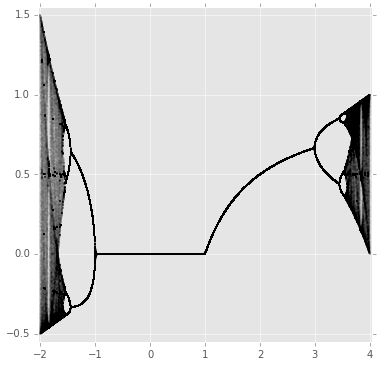

In [18]:
plot_bifurcation(r_start=-2, ymin=-0.5, ymax=1.5)